In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import pickle
import warnings
warnings.filterwarnings('ignore')

# Load the dataset:

In [137]:
data=pd.read_excel(r"C:\Users\disha\Downloads\marketing_campaign (1).xlsx")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [138]:
data.shape

(2240, 29)

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

# Checking for missing values:

In [140]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

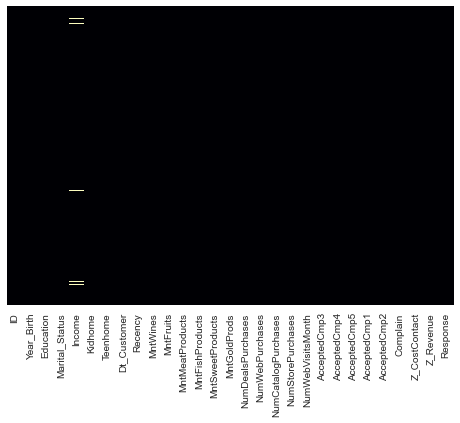

In [141]:
sns.heatmap(data.isnull(), cmap='magma', yticklabels=False, cbar=False)
plt.show()

In [142]:
data=data.dropna()

In [143]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [144]:
data.duplicated().sum()

0

In [145]:
data.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

# Summary Statistics:

In [146]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [147]:
data.describe(include=['object'])

,Education,Marital_Status
count,2216,2216
unique,5,8
top,Graduation,Married
freq,1116,857


# Feature Engineering:

In [148]:
data['Age'] = 2015 - data['Year_Birth']

In [149]:
data['Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

In [150]:
data['Living_With'] = data['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'})

In [151]:
data['Children'] = data['Kidhome'] + data['Teenhome']

In [152]:
data['Family_Size'] = data['Living_With'].replace({'Alone': 1, 'Partner':2}) + data['Children']

In [153]:
data['Is_Parent'] = np.where(data.Children > 0, 1, 0)

In [154]:
data['Education'] = data['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

In [155]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,58,1617,Alone,0,1,0
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,61,27,Alone,2,3,1
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,50,776,Partner,0,2,0
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,31,53,Partner,1,3,1
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,34,422,Partner,1,3,1


In [156]:
data['Education'].value_counts()

Graduate         1116
Postgraduate      846
Undergraduate     254
Name: Education, dtype: int64

In [157]:
to_drop = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
data = data.drop(to_drop, axis=1)

In [158]:
data.describe(include=object)

,Education,Living_With
count,2216,2216
unique,3,2
top,Graduate,Partner
freq,1116,1430


In [159]:
data['Income'] = data['Income'].astype('int64')

In [160]:
int_cols = [x for x in data.columns if data[x].dtypes=='int64']

In [161]:
def remove_outliers(in_data, in_cols):
    
    first_quartile = in_data[in_cols].quantile(0.25)
    third_quartile = in_data[in_cols].quantile(0.75)
    iqr = third_quartile - first_quartile
    upper_limit = third_quartile + 1.5 * iqr
    lower_limit = first_quartile - 1.5 * iqr
    in_data.loc[(in_data[in_cols] > upper_limit), in_cols] = upper_limit
    in_data.loc[(in_data[in_cols] < lower_limit), in_cols] = lower_limit    
    return in_data

In [162]:
for features in int_cols:
    dataset = remove_outliers(data,features)

In [163]:

data['Education'] = data['Education'].map({'Undergraduate':0, 'Graduate':1, 'Postgraduate':2})

In [164]:
data['Living_With'] = data['Living_With'].map({'Alone':0, 'Partner':1})


In [165]:
dataset_ = data.copy()

In [166]:
cols = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
data= data.drop(cols, axis=1)

In [167]:
scaler = StandardScaler()
data= pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [168]:
p = PCA(n_components=3)
p.fit(data)

PCA(n_components=3)

In [169]:
W = p.components_.T
W

array([[ 0.0115047 ,  0.12649779,  0.53003548],
       [ 0.27489739,  0.16292554,  0.11964093],
       [-0.23678126,  0.01225496, -0.26551286],
       [-0.09125217,  0.45338427,  0.18993738],
       [ 0.00411461,  0.0160867 , -0.03335613],
       [ 0.25230414,  0.19923667,  0.09748938],
       [ 0.25300228,  0.0297752 , -0.22003661],
       [ 0.29378552,  0.01341894, -0.04967565],
       [ 0.26073307,  0.00633436, -0.21123623],
       [ 0.25442806,  0.0298043 , -0.22493749],
       [ 0.19807227,  0.13805301, -0.23169855],
       [-0.08581841,  0.37480449, -0.19990872],
       [ 0.1714831 ,  0.30723185, -0.10000522],
       [ 0.28029254,  0.0953634 ,  0.0070736 ],
       [ 0.23888558,  0.20335521, -0.01646696],
       [-0.22059464,  0.06867196, -0.181224  ],
       [ 0.03910063,  0.21615038,  0.47995762],
       [ 0.309593  ,  0.11968283, -0.02425297],
       [-0.0250982 ,  0.11982079, -0.20057622],
       [-0.23915457,  0.34003221, -0.0544509 ],
       [-0.20944241,  0.34321721, -0.150

In [170]:
p.explained_variance_

array([8.84485331, 3.00939489, 1.42119099])

In [171]:
p.explained_variance_ratio_

array([0.40185736, 0.13672895, 0.06457044])

In [172]:
p.explained_variance_ratio_.cumsum()

array([0.40185736, 0.53858631, 0.60315675])

In [174]:
df_PCA = pd.DataFrame(p.transform(data), columns=(['col1', 'col2', 'col3']))
df_PCA.describe()

,col1,col2,col3
count,2.216000e+03,2.216000e+03,2.216000e+03
mean,1.202408e-17,3.246501e-17,-4.408828e-18
std,2.974030e+00,1.734761e+00,1.192137e+00
min,-5.240740e+00,-4.467228e+00,-5.029557e+00
25%,-2.669935e+00,-1.356155e+00,-8.090966e-01
50%,-8.383378e-01,-1.761423e-01,1.920762e-02
75%,2.576374e+00,1.304857e+00,8.439077e-01
max,7.061699e+00,6.021674e+00,3.523790e+00


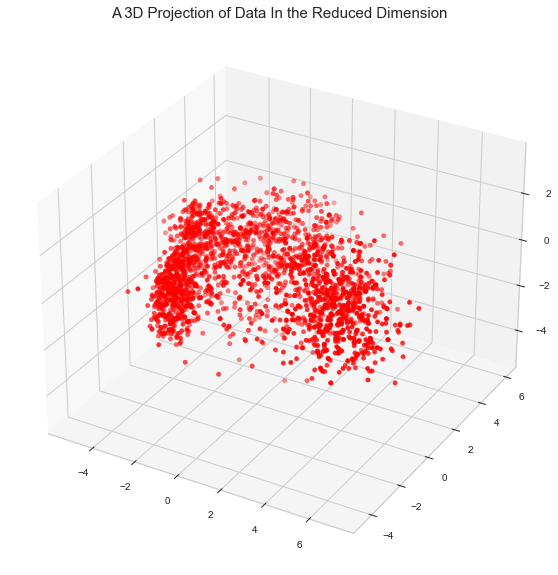

In [175]:
x = df_PCA['col1']
y = df_PCA['col2']
z = df_PCA['col3']

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='red', marker='o')
ax.set_title('A 3D Projection of Data In the Reduced Dimension', fontsize=15)
plt.show()

In [88]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Family_Size,Is_Parent,Education_Level,Enrollment_Year,Response_Group,PC1,PC2,PC3,PC4,PC5
0,Graduation,58138.0,0,0,58,635,88,546,172,88,...,1,0,Graduate,2012,Responded,4.650868,-0.242964,-1.114748,0.590640,0.523652
1,Graduation,46344.0,1,1,38,11,1,6,2,1,...,3,1,Graduate,2014,Not Responded,-2.840099,0.448961,1.389332,-1.037842,-0.564738
2,Graduation,71613.0,0,0,26,426,49,127,111,21,...,2,0,Graduate,2013,Not Responded,2.242545,-0.648324,0.340897,0.986082,-0.765791
3,Graduation,26646.0,1,0,26,11,4,20,10,3,...,3,1,Graduate,2014,Not Responded,-2.528772,-1.509563,-0.909442,-0.112324,-0.795759
4,PhD,58293.0,1,0,94,173,43,118,46,27,...,3,1,Postgraduate,2014,Not Responded,-0.472317,0.050453,-1.685524,-0.799823,1.377364


In [89]:
numeric_features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 
                    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                    'NumWebVisitsMonth', 'Age', 'Total_Spent', 'Total_Children', 'Family_Size']

In [26]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_features])

In [27]:
pca = PCA(n_components=5) 
pca_components = pca.fit_transform(data_scaled)

In [56]:
pca_data = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])
data = pd.concat([data.reset_index(drop=True), pca_data.reset_index(drop=True)], axis=1)


In [29]:
W = pca.components_.T
W

array([[ 2.56644245e-01,  1.39248117e-01,  1.35993417e-01,
        -1.93963788e-01, -7.37616864e-02],
       [-2.54241720e-01,  2.65217452e-02, -3.71490239e-01,
        -3.43879277e-01, -4.48460040e-02],
       [-8.76791583e-02,  5.05110021e-01,  2.80318882e-01,
        -6.80222051e-02, -3.85852809e-02],
       [ 3.63389474e-03,  1.88297773e-02,  8.90016819e-03,
        -2.01981033e-01,  9.74134867e-01],
       [ 2.71713718e-01,  1.92253792e-01, -1.11845078e-02,
         1.92138996e-01,  5.97041267e-02],
       [ 2.50758816e-01, -1.31228111e-02, -1.69353055e-01,
        -2.37492197e-01, -9.26279145e-02],
       [ 2.95736086e-01, -2.04231826e-02, -8.56119846e-02,
        -1.80343418e-01, -4.27244223e-03],
       [ 2.60661211e-01, -2.37617489e-02, -1.51834370e-01,
        -2.32438212e-01, -7.26122710e-02],
       [ 2.49524510e-01, -9.00487688e-04, -1.58019792e-01,
        -2.37918978e-01, -4.18430393e-02],
       [ 2.02395561e-01,  1.24590173e-01, -1.98837428e-01,
         1.19722993e-01

In [30]:
pd.DataFrame(pca, index=data.columns, columns=['W1','W2','W3'])

,W1,W2,W3
Education,PCA(n_components=5),PCA(n_components=5),PCA(n_components=5)
Income,PCA(n_components=5),PCA(n_components=5),PCA(n_components=5)
Kidhome,PCA(n_components=5),PCA(n_components=5),PCA(n_components=5)
Teenhome,PCA(n_components=5),PCA(n_components=5),PCA(n_components=5)
Recency,PCA(n_components=5),PCA(n_components=5),PCA(n_components=5)
MntWines,PCA(n_components=5),PCA(n_components=5),PCA(n_components=5)
MntFruits,PCA(n_components=5),PCA(n_components=5),PCA(n_components=5)
MntMeatProducts,PCA(n_components=5),PCA(n_components=5),PCA(n_components=5)
MntFishProducts,PCA(n_components=5),PCA(n_components=5),PCA(n_components=5)
MntSweetProducts,PCA(n_components=5),PCA(n_components=5),PCA(n_components=5)


In [31]:
pca.explained_variance_ratio_

array([0.40234641, 0.13534346, 0.06543891, 0.05994645, 0.05251039])

In [32]:
pd.DataFrame(pca.explained_variance_ratio_, index=range(1,6), columns=['Explained Variability'])

,Explained Variability
1,0.402346
2,0.135343
3,0.065439
4,0.059946
5,0.052510


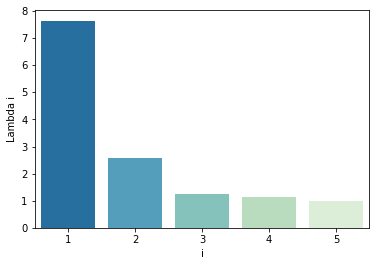

In [33]:
sns.barplot(x = list(range(1,6)), y = pca.explained_variance_, palette = 'GnBu_r')
plt.xlabel('i')
plt.ylabel('Lambda i');

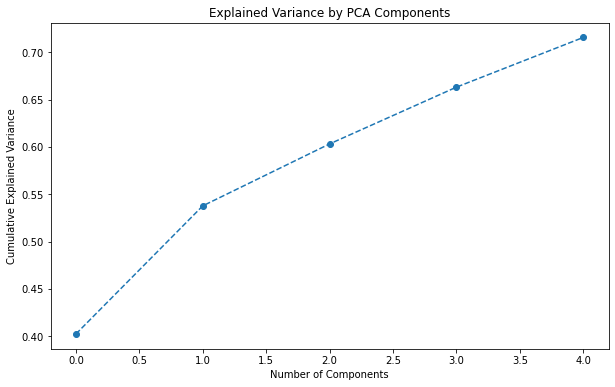

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.show()

# Age Distribution:

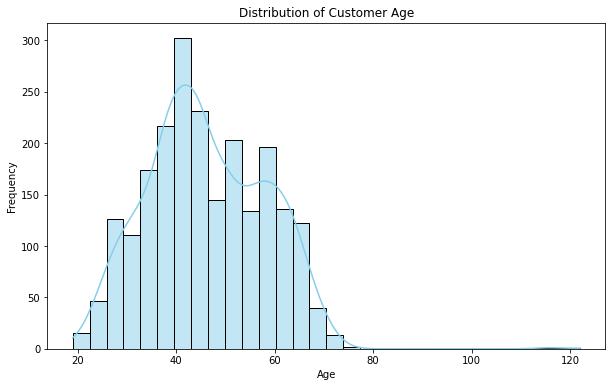

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


The histogram shows most customers are aged 30-60 and very few customers over 80.
The distribution is slightly right-skewed, indicating more younger customers.


# Total Amount Spent: 

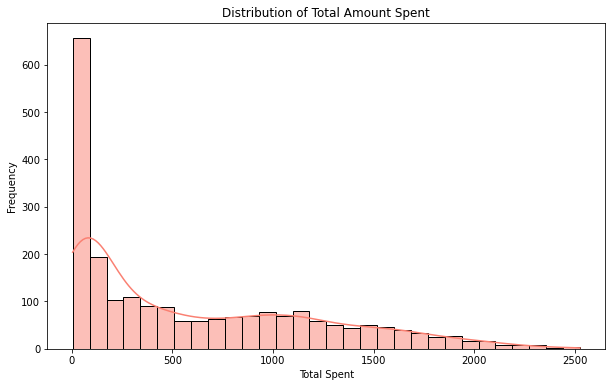

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Total_Spent'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Total Amount Spent')
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.show()


Most customers tend to spend small amounts, with a few outliers spending much higher amounts.

# Education Level Distribution

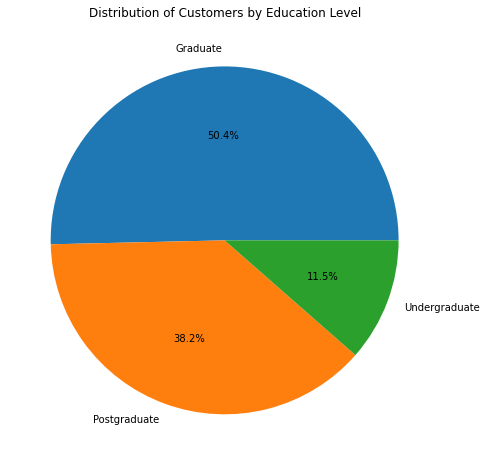

In [37]:
plt.figure(figsize=(8, 8))
plt.pie(data['Education_Level'].value_counts(), labels=data['Education_Level'].unique(), autopct="%1.1f%%")
plt.title('Distribution of Customers by Education Level')
plt.show()

# Total Spent by Education Level (Bar Chart)

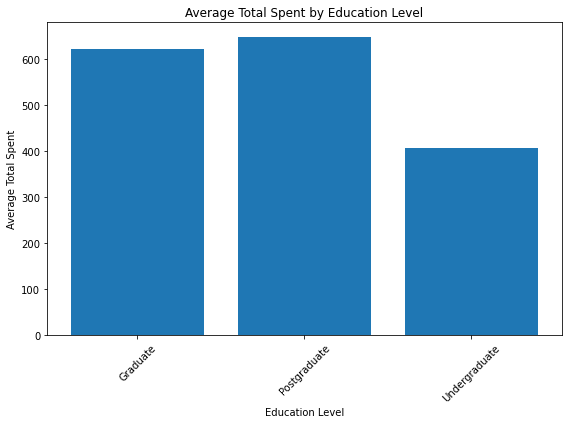

In [38]:
average_spend_by_education = data.groupby('Education_Level')['Total_Spent'].mean()
plt.figure(figsize=(8, 6))
plt.bar(average_spend_by_education.index, average_spend_by_education.values)
plt.xlabel('Education Level')
plt.ylabel('Average Total Spent')
plt.title('Average Total Spent by Education Level')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

# Product Category Spending Distribution

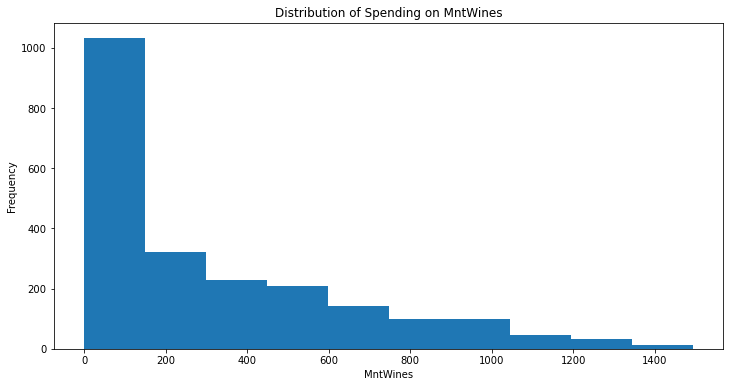

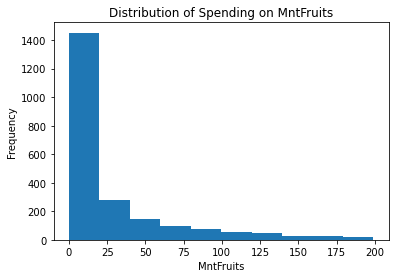

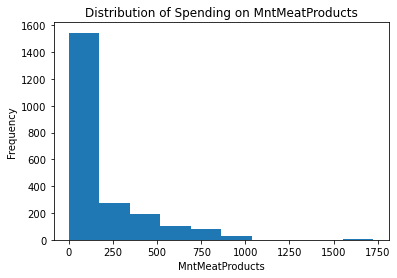

In [39]:
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts'] 
plt.figure(figsize=(12, 6))
for col in product_cols:
  plt.hist(data[col])
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of Spending on {col}')
  plt.show()

# Correlations Between Product Categories

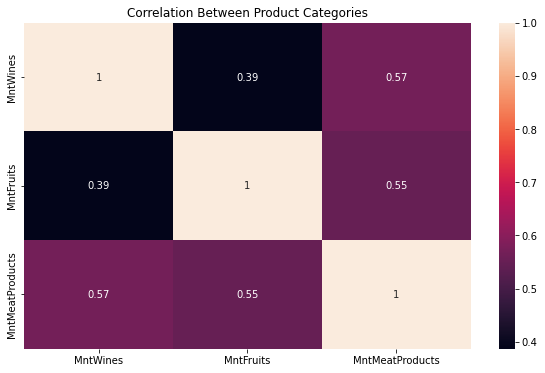

In [40]:
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts'] 
correlation_matrix = data[product_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Between Product Categories')
plt.show()


# Customer Acquisition Analysis

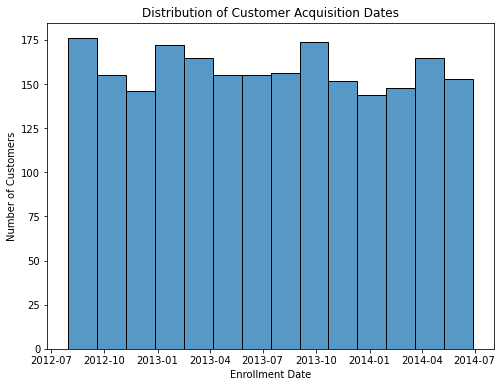

In [41]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Enrollment_Date'])  
plt.xlabel('Enrollment Date')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Acquisition Dates')
plt.show()

# Average Total Spent Over Time Since Enrollment

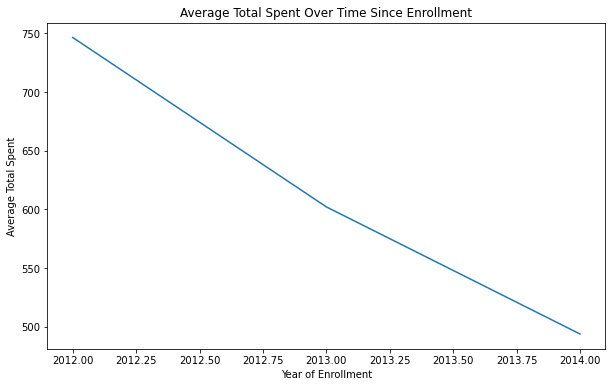

In [42]:
data['Enrollment_Year'] = pd.to_datetime(data['Enrollment_Date']).dt.year 
average_spend_by_year = data.groupby('Enrollment_Year')['Total_Spent'].mean()
plt.figure(figsize=(10, 6))
plt.plot(average_spend_by_year.index, average_spend_by_year.values)
plt.xlabel('Year of Enrollment')
plt.ylabel('Average Total Spent')
plt.title('Average Total Spent Over Time Since Enrollment')
plt.show()

# Living Status:

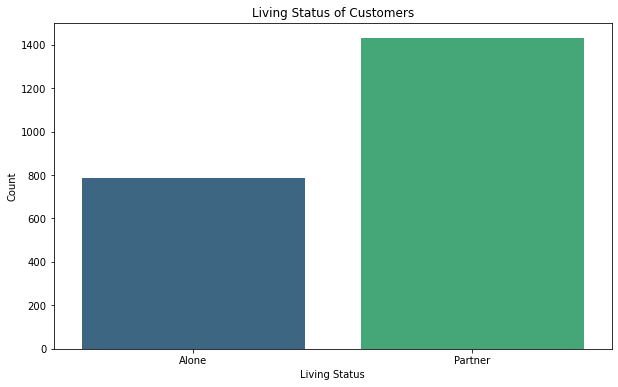

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(data['Living_Status'], palette='viridis')
plt.title('Living Status of Customers')
plt.xlabel('Living Status')
plt.ylabel('Count')
plt.show()


# Response by Living Status and Total Spent:

<Figure size 720x432 with 0 Axes>

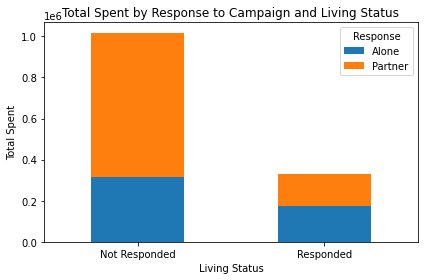

In [44]:
data['Response_Group'] = ['Responded' if x == 1 else 'Not Responded' for x in data['Response']]
total_spend_by_response_status = data.groupby(['Response_Group', 'Living_Status'])['Total_Spent'].sum().unstack()
plt.figure(figsize=(10, 6))
total_spend_by_response_status.plot(kind='bar', stacked=True)
plt.xlabel('Living Status')
plt.ylabel('Total Spent')
plt.title('Total Spent by Response to Campaign and Living Status')
plt.legend(title='Response')
plt.xticks(rotation=0)  
plt.tight_layout()
plt.show()

# Family Size vs. Total Spent

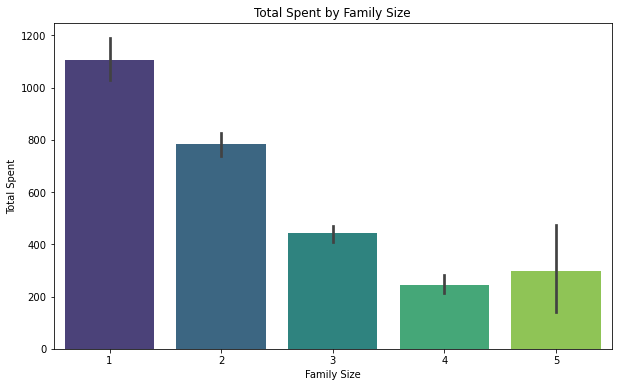

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Family_Size', y='Total_Spent', data=data, palette='viridis')
plt.title('Total Spent by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Total Spent')
plt.show()

# Model Building:

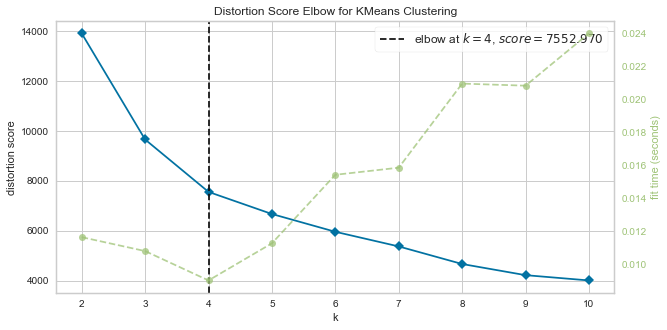

In [178]:
plt.figure(figsize=(10,5))
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_PCA)
Elbow_M.show()
plt.show()

In [179]:
AC = AgglomerativeClustering(n_clusters=4)
yhat_AC = AC.fit_predict(df_PCA)
df_PCA['Clusters'] = yhat_AC
dataset['Clusters'] = yhat_AC
dataset_['Clusters'] = yhat_AC

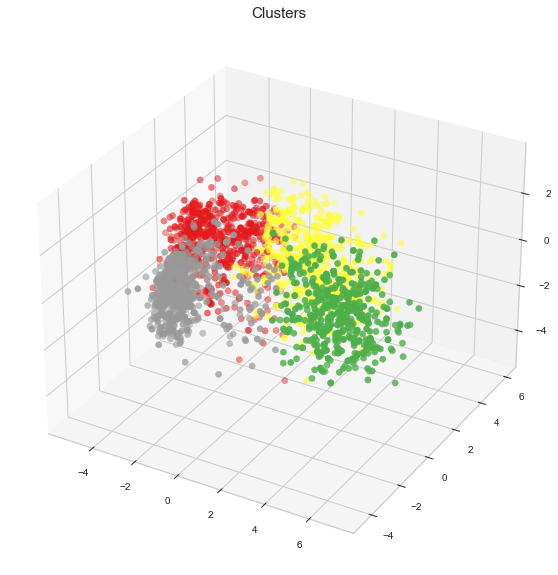

In [180]:
fig = plt.figure(figsize=(15,10))
ax = plt.subplot(111, projection='3d', label='bla')
ax.scatter(x, y, z, s=40, c=df_PCA['Clusters'], marker='o', cmap='Set1_r')
ax.set_title('Clusters', fontsize=15)
plt.show()

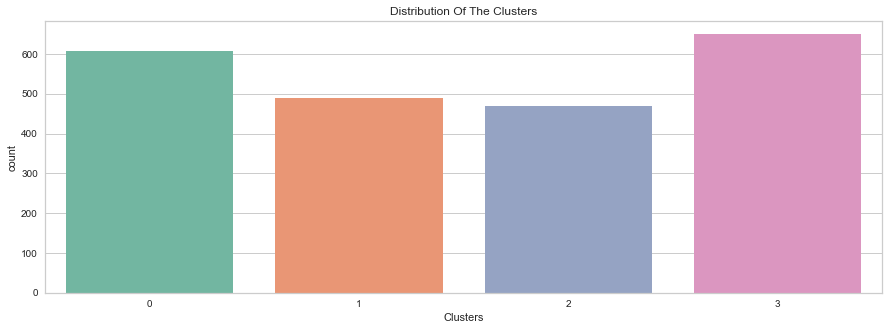

In [181]:
plt.figure(figsize=(15,5))
pl = sns.countplot(x=dataset['Clusters'], palette='Set2')
pl.set_title('Distribution Of The Clusters')
plt.show()

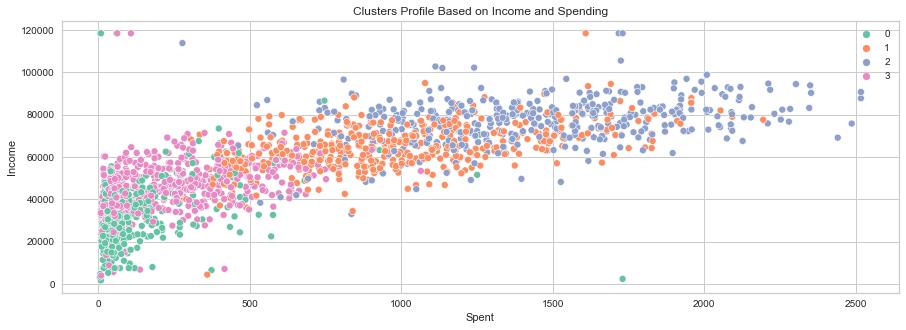

In [182]:
plt.figure(figsize=(15,5))
pl = sns.scatterplot(data=dataset_, x=dataset_['Spent'], y=dataset_['Income'], hue=dataset_['Clusters'], palette='Set2')
pl.set_title('Clusters Profile Based on Income and Spending')
plt.legend()
plt.show()

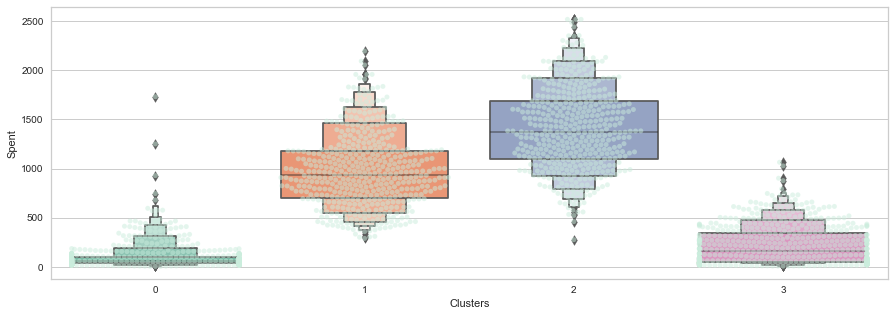

In [184]:
plt.figure(figsize=(15,5))
pl = sns.swarmplot(x=dataset_['Clusters'], y=dataset_['Spent'], color='#CBEDDD', alpha=0.5)
pl = sns.boxenplot(x=dataset_['Clusters'], y=dataset_['Spent'], palette='Set2')
plt.show()

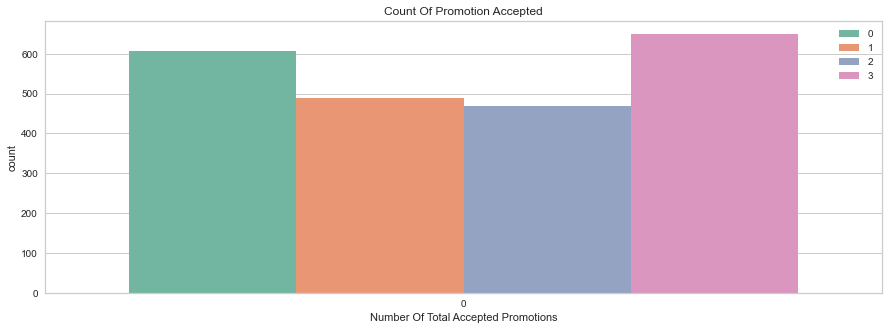

In [185]:
dataset_['Total_Promos'] = dataset_['AcceptedCmp1'] + dataset_['AcceptedCmp2'] + dataset_['AcceptedCmp3'] + dataset_['AcceptedCmp4'] + dataset_['AcceptedCmp5']

plt.figure(figsize=(15,5))
pl = sns.countplot(x=dataset_['Total_Promos'], hue=dataset_['Clusters'], palette='Set2')
pl.set_title('Count Of Promotion Accepted')
pl.set_xlabel('Number Of Total Accepted Promotions')
plt.legend(loc='upper right')
plt.show()

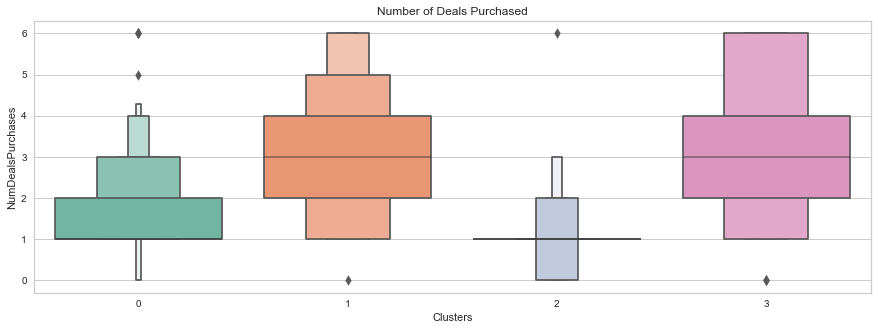

In [186]:
plt.figure(figsize=(15,5))
pl = sns.boxenplot(y=dataset_['NumDealsPurchases'], x=dataset_['Clusters'], palette='Set2')
pl.set_title('Number of Deals Purchased')
plt.show()

<Figure size 1080x360 with 0 Axes>

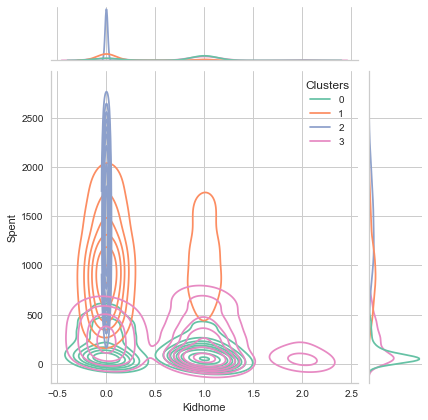

<Figure size 1080x360 with 0 Axes>

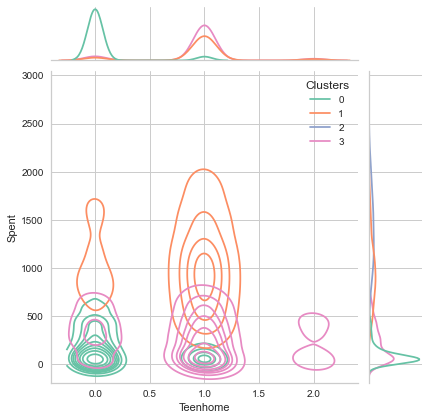

<Figure size 1080x360 with 0 Axes>

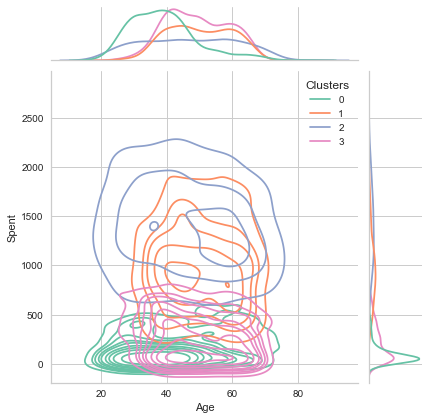

<Figure size 1080x360 with 0 Axes>

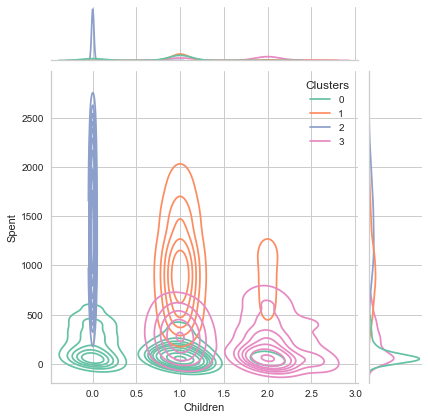

<Figure size 1080x360 with 0 Axes>

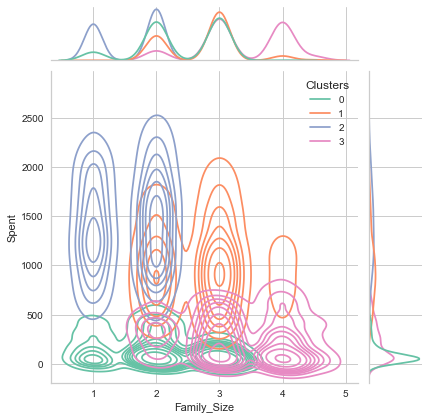

<Figure size 1080x360 with 0 Axes>

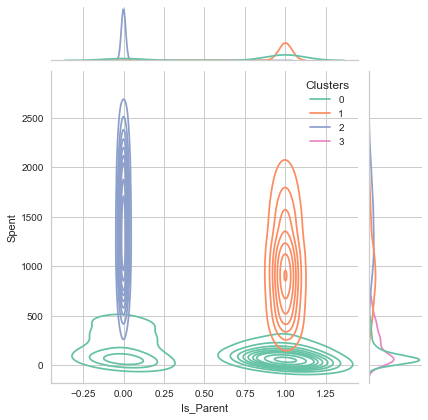

<Figure size 1080x360 with 0 Axes>

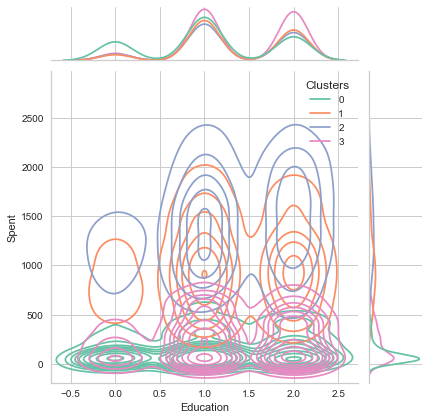

<Figure size 1080x360 with 0 Axes>

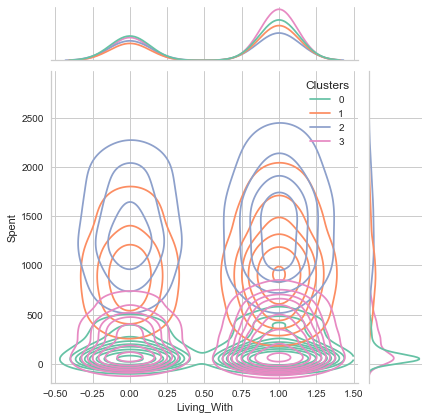

In [187]:
cols = ['Kidhome', 'Teenhome', 'Age', 'Children', 'Family_Size', 'Is_Parent', 'Education', 'Living_With']

for i in cols:
    plt.figure(figsize=(15,5))
    sns.jointplot(x=dataset_[i], y=dataset_['Spent'], hue=dataset_['Clusters'], kind='kde', palette='Set2')
plt.show()

In [188]:
dataset_ = dataset_.astype(int)

In [189]:
kmeans_model = KMeans(4)
kmeans_model.fit_predict(dataset_)

array([0, 3, 2, ..., 0, 0, 0])

In [190]:
pca_df_kmeans = pd.concat([dataset_,pd.DataFrame({'Clusters':kmeans_model.labels_})],axis=1)

In [196]:
X = dataset_.drop(['Clusters'], axis=1)
y = dataset_[['Clusters']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2)

In [200]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[115   1   1   6]
 [  0  83   3   5]
 [  2   0  94   0]
 [  5   3   0 126]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       123
           1       0.95      0.91      0.93        91
           2       0.96      0.98      0.97        96
           3       0.92      0.94      0.93       134

    accuracy                           0.94       444
   macro avg       0.94      0.94      0.94       444
weighted avg       0.94      0.94      0.94       444



In [201]:
rf = RandomForestClassifier(criterion='entropy')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[114   0   1   8]
 [  0  82   3   6]
 [  1   0  95   0]
 [  2   3   0 129]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       123
           1       0.96      0.90      0.93        91
           2       0.96      0.99      0.97        96
           3       0.90      0.96      0.93       134

    accuracy                           0.95       444
   macro avg       0.95      0.95      0.95       444
weighted avg       0.95      0.95      0.95       444



In [202]:
xgb = XGBClassifier(criterion='entropy')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[114   1   2   6]
 [  0  84   2   5]
 [  1   0  95   0]
 [  2   4   0 128]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       123
           1       0.94      0.92      0.93        91
           2       0.96      0.99      0.97        96
           3       0.92      0.96      0.94       134

    accuracy                           0.95       444
   macro avg       0.95      0.95      0.95       444
weighted avg       0.95      0.95      0.95       444



In [203]:
dataset_.to_csv('clustered_customer.csv')

In [204]:
filename = 'model.pkl'
pickle.dump(xgb, open(filename, 'wb'))
 
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.9481981981981982 % Acuuracy


# About Cluster 0:

1.The majority of these people are parents

2.At max have 3 members in the family

3.They majorly have one kid and typically not tennagers

4.Relatively younger

# About Cluster 1:

1.Definitely a parent

2.At max have 4 members in the family and at least 2

3.Most have a teeanger in home

4.Single parents are a subset of this group

5.Relatively older

# About Cluster 2:

1.Definitely not a parent

2.At max are only 2 members in the family.

3.A slight majority of couples over single people

4.Span all ages

5.high income and high spending

# About Cluster 3:

1.Definitely a parent

2.At max have 5 members in the family and at least 2

3.Majority of them have a teenager at home

4.Relatively older